In [1]:
#import all packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define the acceleration function
gamma = 0   #set the damping factor
omega = 1   #set the frequency parameter

def acc(x, v):  #this is based on the differential equation
    return -omega**2*x - gamma*v

In [3]:
#define the parameters
final_time = 20  #set the time duration and time steps for integration
dt = 0.01
N = int(final_time/dt)  #this sets the number of data points

#set initial conditions
pos_0 = np.array([1,0])  #define the initial position and velocity as vectors
vel_0 = np.array([0.5, 0.05])

In [4]:
#define the empty lists
time = np.zeros(N+1, dtype = float)  #define the lists to store values for time, position, and velocity
velocity = np.zeros((N+1,2), dtype = float)
position = np.zeros((N+1,2), dtype = float)

#save the initial conditions in the lists
position[0] = pos_0  
velocity[0] = vel_0 + acc(pos_0, vel_0)*dt/2  #use the leap-frog algorithm


In [5]:
#define the Euler algorithm to fill the grid
for i in range(1,N+1):
    position[i] = position[i-1] + velocity[i-1]*dt
    velocity[i] = velocity[i-1] + acc(position[i], velocity[i-1])*dt
    time[i] = i*dt

In [6]:
#Slice the vectors into each component    
pos_x = [position[i][0] for i in range(0,N+1)]
pos_y = [position[i][1] for i in range(0,N+1)]

vel_x = [velocity[i][0] for i in range(0,N+1)]
vel_y = [velocity[i][0] for i in range(0,N+1)]

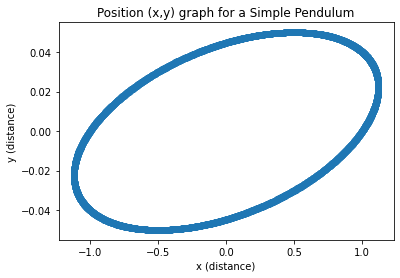

In [7]:
#plot the above results to show the ellipse
plt.scatter(pos_x, pos_y)   #We can also change the damping factor to show the spiraling effect
plt.xlabel('x (distance)')
plt.ylabel('y (distance)')
plt.title('Position (x,y) graph for a Simple Pendulum')
plt.show()

In [8]:
#define the approximate solution  #compare with x = A sin(wt) + B cos(wt) and v = A w cos(wt) -B w sin(wt)
A = pos_0  #set the A and B values from the initial condition
B = vel_0/omega

Approx_sol = [A*np.sin(omega*t) + B * np.cos(omega*t) for t in time]  #calculate the data points from approximate solution

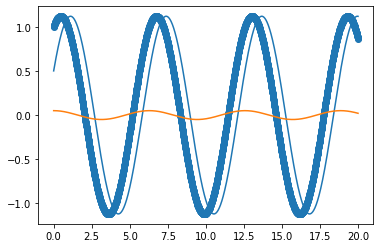

In [9]:
#Plot the approximate and simulated solution
plt.scatter(time, pos_x)
plt.plot(time, Approx_sol)
plt.show()